In [1]:
from func import *
import matplotlib.pyplot as plt
from tensorflow import summary as sm
from keras import models, layers
from keras.callbacks import ModelCheckpoint
import datetime
import os
import requests
from openpyxl import Workbook



In [2]:
VERSION = 'Main'

FILE_00 = 'data.csv'
FILE_01 = 'data1.csv'
FILE_02 = 'data2.csv'
drop_labels_x = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)','dV/dt(V/s)',\
                  'Charge_Energy(Wh)', 'Discharge_Energy(Wh)','Internal_Resistance(Ohm)', 'Is_FC_Data','AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)','Have_Capacity(Ah)','SoC(%)']
drop_labels_y = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Current(A)', 'Discharge_Capacity(Ah)'\
                 , 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'dV/dt(V/s)', 'Internal_Resistance(Ohm)', 'Is_FC_Data', 'AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)','Have_Capacity(Ah)','SoC(%)']

param = {'seq_len' : 20, 'num_units' : 150, 'window' : 5, 'dropout': 0.2, 'num_epochs' : 2000, 'num_dense': 80,'batch':200}

log_dir = f"logs/{VERSION}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M") + f'{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ'
file_path = f'Checkpoints\{VERSION}\SOH_Checkpoint\{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ\{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5'
hist_freq = 250

save_path = f'outputs\{VERSION}\{param["num_units"]}UN-{param["num_epochs"]}EP-{param["seq_len"]}SQ'
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print('Error Creating Directory...')

Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['Voltage(V)'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['Voltage(V)'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['Voltage(V)'], dtype='object')
data00 = (11166, 2)


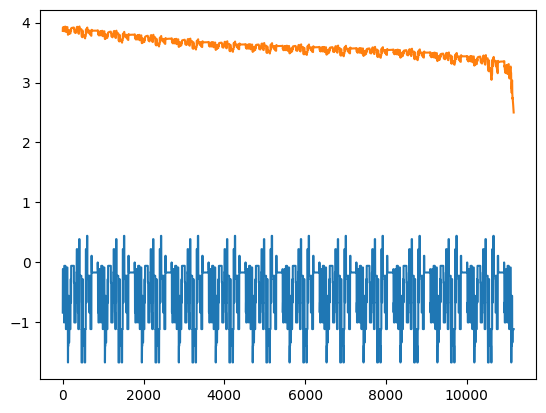

data01 = (10628, 2)


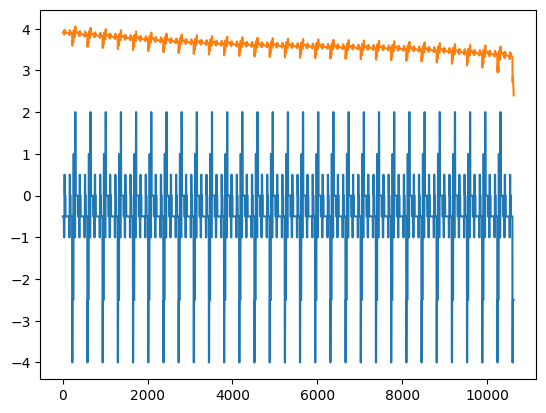

data02 = (11077, 2)


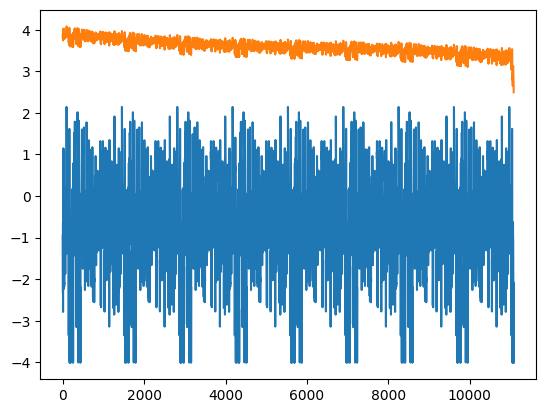

In [3]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data_test, data_cap_test = get_data(FILE_02, drop_labels_x, drop_labels_y)
#DST
A1 = data00[2604:]
A2 = data_cap00[2604:]
#FUDS
B1 = data01[1933:]
B2 = data_cap01[1933:]
#BJDST
C1 = data_test[1271:]
C2 = data_cap_test[1271:]

data00 = C1 
data_cap00 = C2
data01 = B1
data_cap01 = B2
data_test = A1
data_cap_test = A2


print(f'data00 = {data00.shape}')
pl.plot(data00)
pl.show()
print(f'data01 = {data01.shape}')
pl.plot(data01)
pl.show()
print(f'data02 = {data_test.shape}')
pl.plot(data_test)
pl.show()
savedata00 =  data00
savedata_cap00 =  data_cap00
savedata01 =  data01
savedata_cap01 =  data_cap01
savedata_test = data_test
savedata_cap_test = data_cap_test

In [4]:
# #필터
# Fsize=3
# data00 = lowpass1(data00, Fsize)[Fsize:]
# # data_cap00 = lowpass1(data_cap00,Fsize)[Fsize:]
# data01 = lowpass1(data01,Fsize)[Fsize:]
# # data_cap01 = lowpass1(data_cap01,Fsize)[Fsize:]
# data_test = lowpass1(data_test,Fsize)[Fsize:]
# # data_cap_test = lowpass1(data_cap_test,Fsize)[Fsize:]
# size=(int)(savedata00.shape[0]-Fsize/2)
# savedata00 =  savedata00[Fsize:size]
# # savedata_cap00 =  savedata_cap00[Fsize:size]
# savedata01 =  savedata01[Fsize:size]
# # savedata_cap01 =  savedata_cap01[Fsize:size]
# savedata_test = savedata_test[Fsize:size]
# # savedata_cap_test = savedata_cap_test[Fsize:size]

# print(f'data00 = {data00.shape}')
# print(f'savedata00 = {savedata00.shape}')



In [5]:
# print(f'data00 = {data00.shape}')
# print(f'savedata00 = {savedata00.shape}')

# # pl.figure(dpi=500)
# # pl.ylabel('Voltage')
# # pl.xlabel('Time(s)')
# # line = pl.plot(data_cap_test, label = 'Test data')
# # pl.setp(line, linewidth=0.5)
# # pl.show()
# pl.plot(data00)
# pl.show()
# pl.plot(savedata00)
# pl.show()


In [6]:
# for i in range(0,10):
#     param['num_units']=param['num_units']+80
#     model = models.Sequential()
#     model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
#     model.add(layers.GRU(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
#     model.add(layers.TimeDistributed(layers.Dense(param['num_dense'])))
#     model.add(layers.TimeDistributed(layers.Dense(1)))
#     model.compile(loss = 'mse', optimizer = 'Adam') 
#     model.summary()
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                           TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list)
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                          TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list)
#     print(param['num_units'])
#     RMSE, MAE, Error_rate = show_and_prove(model, file_path, x_test, y_test, save_path, return_loss=True)
#     print(f'RMSE({RMSE:.6f}), MAE({MAE:.6f})')

In [7]:
x_train00 = seq_gen_x(data00, param['seq_len'])
y_train00= seq_gen_y(data_cap00, param['seq_len'])
x_train01 = seq_gen_x(data01, param['seq_len'])
y_train01 = seq_gen_y(data_cap01, param['seq_len'])
x_test = seq_gen_x(data_test, param['seq_len'])
y_test= seq_gen_y(data_cap_test, param['seq_len'])
print(x_train00.shape)
print(x_train01.shape)
print(x_test.shape)

(11145, 20, 2)
(10607, 20, 2)
(11056, 20, 2)


In [8]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.GRU(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# model.add(layers.LSTM(16))
model.add(layers.SimpleRNN(param['num_dense']))
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = 'Adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 150)         69300     
                                                                 
 simple_rnn (SimpleRNN)      (None, 80)                18480     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 87,861
Trainable params: 87,861
Non-trainable params: 0
_________________________________________________________________


In [9]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=500)
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=500)

In [10]:
# EP=0
# datas=[]
# for i in range(0,5):
#     EP=EP+param["num_epochs"]
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 0, validation_split = 0.3, callbacks=callback_list,batch_size=200)
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.3, callbacks=callback_list,batch_size=200)
#     RMSE, MAE, Error_rate = show_and_prove(model, file_path, x_test, y_test, save_path, return_loss=True)
#     print(f'RMSE({RMSE:.6f}), MAE({MAE:.6f})','EP =',EP)
#     datas.append(data=[EP,RMSE,MAE],columns=['epoch','RMSE','MAE'])

# write_wb = Workbook()
# write_ws = write_wb.create_sheet('결과')
# for data in datas:
#     write_ws.append(data)

# write_wb.save(r'C:/Users/Administrator/Desktop/python/excel/export_sample.xlsx')
# RMSE, MAE, Error_rate = show_and_prove(model, file_path, x_test, y_test, save_path, return_loss=True)

In [11]:
# #필터 안적용시
# from calendar import EPOCH


# RMSE_total, MAE_total, Error_rate, prediction_graph, y_graph = prove(model, file_path, x_test, y_test)
    
# print(prediction_graph.shape)
# print(y_test.shape)
# print('......')
# print(save_path)
# # prediction_graph=relow(prediction_graph, savedata_cap_test, Fsize)
# # savedata_cap_test=savedata_cap_test[Fsize:]
# print(prediction_graph.shape)
# print(savedata_cap_test.shape)
# pl.figure(dpi=500)
# pl.ylabel('Voltage')
# pl.xlabel('Time(s)')
# line = pl.plot(prediction_graph, label = 'Voltage Estimation')
# pl.setp(line, linewidth=0.5)

# # y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
# pl.setp(y_line, linewidth=0.5)
# pl.legend()
# pl.savefig(f'{save_path}\Estimation.png')
# pl.show()

In [12]:
# #필터 안적용시
# Error_rate = []
# Error = []

# for step in range(len(prediction_graph)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
#         Error.append(Error_rate[step] / 100)
    

# RMSE_total = np.sqrt(np.mean(np.square(Error)))
# MAE_total = np.mean(np.absolute(Error))
# pl.figure(dpi=150)
# line = pl.plot(Error_rate)
# pl.ylim(-10, 10)
# pl.ylabel('SOC Error (%)')
# pl.xlabel('time(s)')
# pl.setp(line, color='b', linewidth=0.5)
# pl.savefig(f'{save_path}\\ErrRate-RMSE({RMSE:.4f})MAE({MAE:.4f}).png')
# pl.show()
# print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')

346/346 [==============================] - 2s 5ms/step
(11056, 1)
(11056, 1)
(11077, 1)
......
outputs\Main\150UN-2000EP-20SQ
(11056, 1)
(11058, 1)


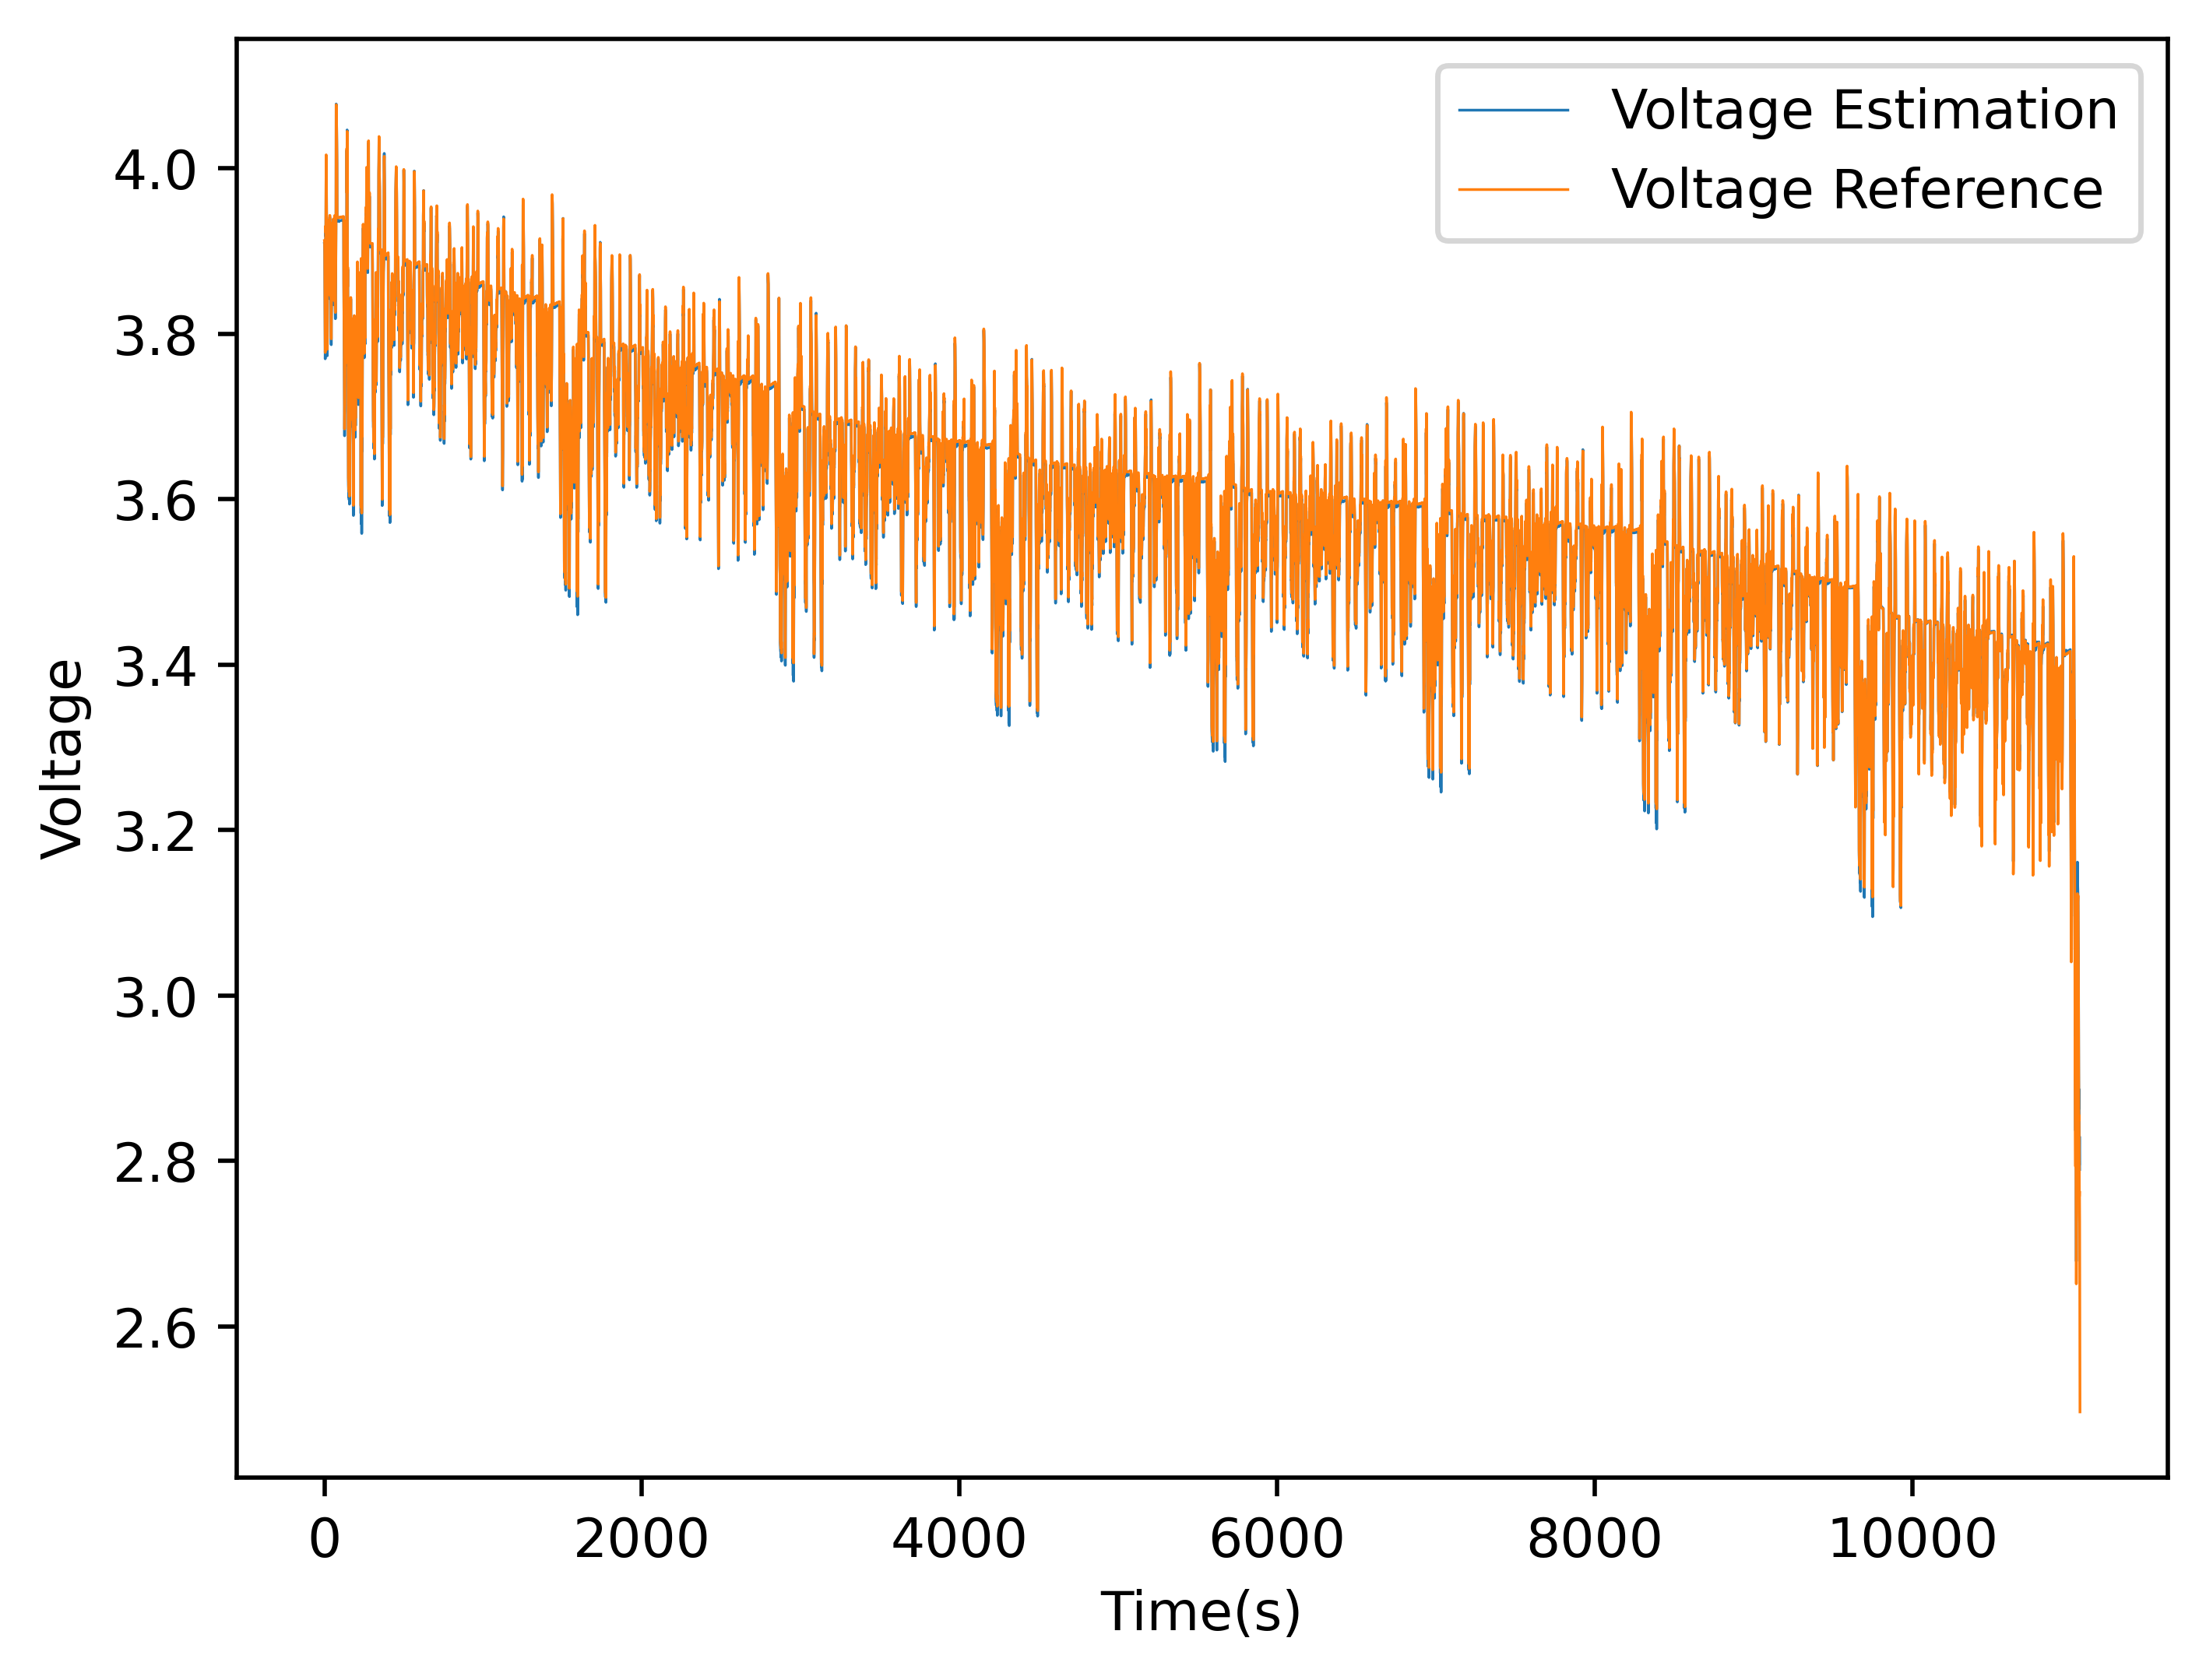

In [13]:
#필터적용시
from calendar import EPOCH

RMSE_total, MAE_total, Error_rate, prediction_graph, y_graph = prove(model, file_path, x_test, y_test)

print(prediction_graph.shape)
print(y_test.shape)
print(savedata_cap_test.shape)
print('......')
print(save_path)
y_graph=savedata_cap_test[19:]
print(prediction_graph.shape)
print(y_graph.shape)
pl.figure(dpi=500)
pl.ylabel('Voltage')
pl.xlabel('Time(s)')
line = pl.plot(prediction_graph, label = 'Voltage Estimation')
pl.setp(line, linewidth=0.5)

y_line = pl.plot(y_graph, label = 'Voltage Reference')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
pl.setp(y_line, linewidth=0.5)
pl.legend()
pl.savefig(f'{save_path}\\datetime.now().{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.png')
pl.show()


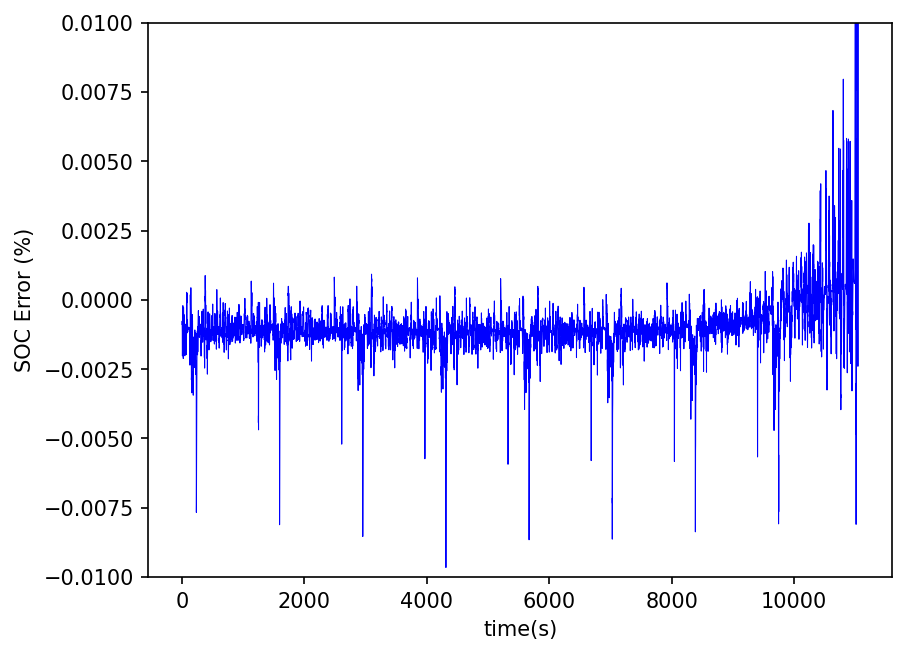

RMSE(0.001641), MAE(0.001175)


In [14]:
#필터 적용시
Error_rate = []
Error = []

for step in range(len(prediction_graph)):
        Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] )
        # Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
        Error.append(Error_rate[step] )
    

RMSE_total = np.sqrt(np.mean(np.square(Error)))
MAE_total = np.mean(np.absolute(Error))
pl.figure(dpi=150)
line = pl.plot(Error_rate)
pl.ylim(-0.01, 0.01)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
pl.savefig(f'{save_path}\\ErrRate-RMSE({RMSE_total:.4f})MAE({MAE_total:.4f}).png')
pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')

In [15]:
# print(prediction_graph.shape)
# print(y_graph.shape)
# # size=(int)(prediction_graph.shape[0]+Fsize-1)
# reprediction_graph = relow1(prediction_graph,y_graph,Fsize)[Fsize:]
# # rey_graph=y_graph[Fsize:size-1]
# print(reprediction_graph.shape)
# print(rey_graph.shape)
# reprediction_graph=reprediction_graph[:9900]
# rey_graph=rey_graph[:9900]

In [16]:
# Error_rate = []
# Error = []

# for step in range(len(reprediction_graph)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error_rate.append((reprediction_graph[step] - rey_graph[step]) / rey_graph[step] * 100)
#         Error.append(Error_rate[step] / 100)
    
# RMSE_total = np.sqrt(np.mean(np.square(Error)))
# MAE_total = np.mean(np.absolute(Error))
# pl.figure(dpi=150)
# line = pl.plot(Error_rate)
# pl.ylim(-1, 1)
# pl.ylabel('SOC Error (%)')
# pl.xlabel('time(s)')
# pl.setp(line, color='b', linewidth=0.5)
# EP=param['num_epochs']
# pl.show()
# print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


In [17]:
# pl.figure(dpi=500)
# pl.ylabel('Voltage')
# pl.xlabel('Time(s)')
# line = pl.plot(reprediction_graph, label = 'Voltage Estimation')
# pl.setp(line, linewidth=0.5)

# y_line = pl.plot(rey_graph, label = 'Voltage Reference')
# # y_line = pl.plot(y_graph, label = 'Voltage Reference')
# pl.setp(y_line, linewidth=0.5)
# pl.legend()
# pl.show()
